
# Picture notebook!

In [17]:
using Plots
using DelimitedFiles

## Real Graph Inference (Hospitals)

In [35]:
try_max = 1
nobs_set = [10, 25]#, 40, 80, 160, 300]
T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("./RealGraph/try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("./RealGraph/try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("./RealGraph/try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("./RealGraph/try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("./RealGraph/try$(trial)nobs$(nobs)mc.txt")
    end
end

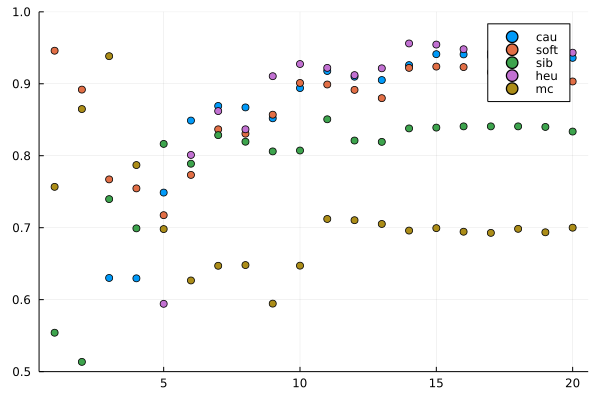

In [43]:
tr, ob = 1 , 2
scatter(AUcau[tr,ob,:],label="cau")
scatter!(AUsoft[tr,ob,:], label="soft")
scatter!(AUsib[tr,ob,:], label = "sib")
scatter!(AUheu[tr,ob,:], label = "heu")
scatter!(AUmh[tr,ob,:], label = "mc")
ylims!(0.5,1)

In [ ]:
sum(AUcau,dims=)

## Hyperparameters Inference

In [20]:
d1=readdlm("./Hyperparams/descent.txt")
d2=readdlm("./Hyperparams/descent2.txt")
d3=readdlm("./Hyperparams/descent3.txt")
d4=readdlm("./Hyperparams/descent4.txt")
d5=readdlm("./Hyperparams/descent5.txt")
fe=readdlm("./Hyperparams/hyperparams.txt");

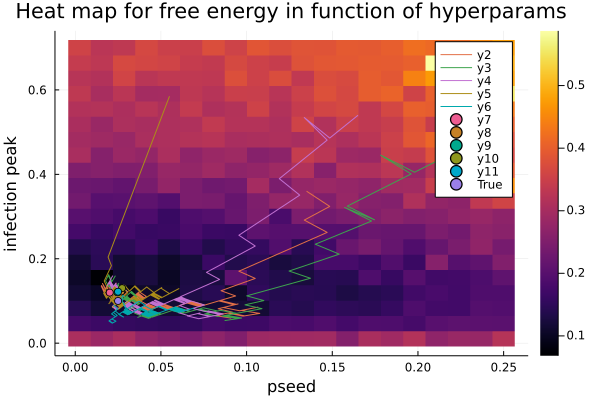

In [21]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(log.(log.(fe'))), xlabel="pseed", ylabel="infection peak",title="Heat map for free energy in function of hyperparams")
plot!(d1[:,1],d1[:,2])
plot!(d2[:,1],d2[:,2])
plot!(d3[:,1],d3[:,2])
plot!(d4[:,1],d4[:,2])
plot!(d5[:,1],d5[:,2])
scatter!([d1[end,1]],[d1[end,2]])
scatter!([d2[end,1]],[d2[end,2]])
scatter!([d3[end,1]],[d3[end,2]])
scatter!([d4[end,1]],[d4[end,2]])
scatter!([d5[end,1]],[d5[end,2]])
scatter!([1/40,],[0.1],label="True")
#savefig("Hyperdescent")    

## Hyperparams Comparison

In [22]:
fe_cau=readdlm("./Hyperparams/hyper_fe_cau.txt")
fe_soft=readdlm("./Hyperparams/hyper_fe_soft.txt");
fe_Ssoft=readdlm("./Hyperparams/hyper_fe_Ssoft.txt");

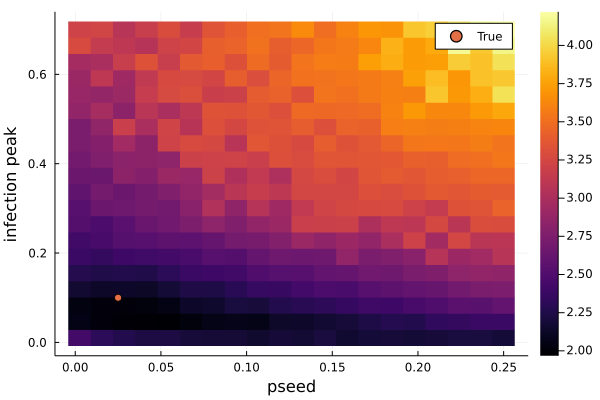

In [23]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_cau), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
#savefig("HyperCauF")

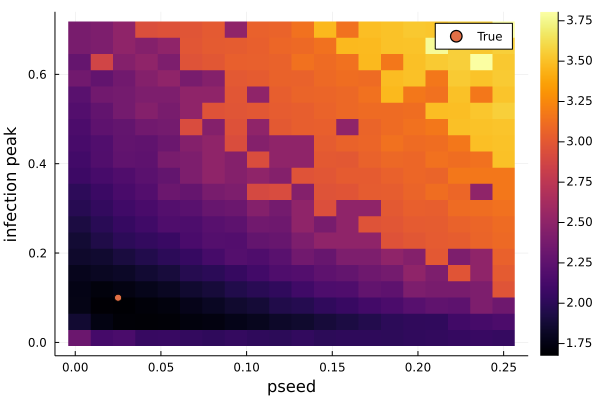

In [24]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_soft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
#savefig("HyperSoftF")

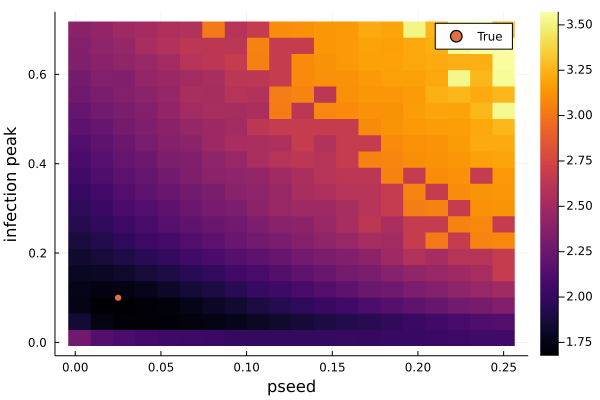

In [25]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_Ssoft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
#savefig("HyperSSoftF")